# Introduction
EDA on Human Activity Recognition 
Author - Mehul Agarwal

In [1]:
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


# To get new datatypes and functions
from collections import Counter
from cycler import cycler

from scipy.stats import norm,skew, probplot
from scipy.optimize import curve_fit

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



from time import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import lightgbm as lgb


## Importing the Data Set
Taken from - https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

In [2]:
data_test=pd.read_csv('C:/Users/MEHUL AGARWAL/Desktop/DataScience/test.csv')
data_train=pd.read_csv('C:/Users/MEHUL AGARWAL/Desktop/DataScience/train.csv')


#data_train['Data'] = 'Train'
#data_test['Data'] = 'Test'

tt_df = pd.concat([data_train,data_test], axis = 0).reset_index(drop = True)
dataset = pd.concat([data_train,data_test], axis = 0).reset_index(drop = True)

### Number of Rows and Columns in Data Set


In [3]:
data_test.shape

(2947, 563)

In [4]:
data_train.shape

(7352, 563)

In [5]:
data_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [6]:
data_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


head() shows the 1st five values in the set

In [7]:
data_test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [8]:
data_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


describe() show all the details related to the dataset

In [9]:
data_test.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [10]:
data_train.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [11]:
data_test.info

<bound method DataFrame.info of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
5              0.279220          -0.018620          -0.113902   
6              0.279746          -0.018271          -0.104000   
7              0.274601          -0.025035          -0.116831   
8              0.272529          -0.020954          -0.114472   
9              0.275746          -0.010372          -0.099776   
10             0.278596          -0.015232          -0.098908   
11             0.279152          -0.021879          -0.109731   
12             0.274544          -0.023145          -0.112540   
13             0.269066          -0.027686          -0.110

In [12]:
data_train.info

<bound method DataFrame.info of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
5              0.277199          -0.010098          -0.105137   
6              0.279454          -0.019641          -0.110022   
7              0.277432          -0.030488          -0.125360   
8              0.277293          -0.021751          -0.120751   
9              0.280586          -0.009960          -0.106065   
10             0.276880          -0.012722          -0.103438   
11             0.276228          -0.021441          -0.108202   
12             0.278457          -0.020415          -0.112732   
13             0.277175          -0.014713          -0.106

## Understanding Dependent Variable

In [13]:
data_test.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [14]:
data_test.Activity.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [15]:
data_train.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [16]:
data_train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

# Data Visualisation

#### To check the missing values

In [17]:
#Check null values
data_test.isnull().values.any()
data_train.isnull().values.any()
# no null values in train and test data

False

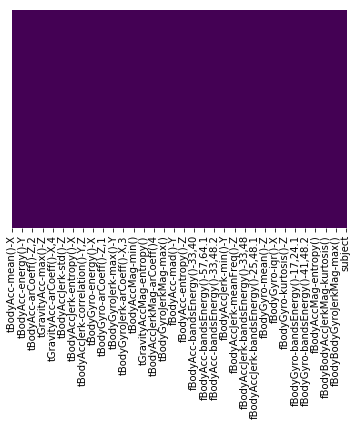

In [18]:
sns.heatmap(data_test.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Dataset has no missing values. If there were any, you would've noticed in figure represented by different colour shade on purple background.

#### To check correlation

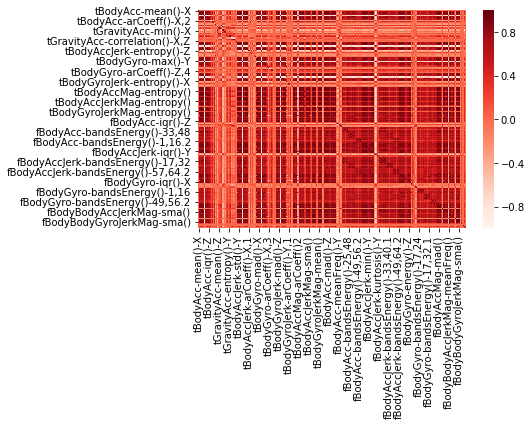

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(data_test.corr(),cmap='Reds',annot=False)

Dark shades represents positive correlation while lighter shades represents negative correlation. If you set annot=True, you'll get values by which features are correlated to each other in grid-cells.

In [20]:
#label_counts = label.value_counts()

#n = label_counts.shape[0]
#colormap = get_cmap('viridis')
#colors = [rgb2hex(colormap(col)) for col in np.arange(0,1.01,1/(n-1))]

#data = go.Bar(x = label_counts.index,
#             y = label_counts,
#             marker = dict(color = colors))

#layout = go.Layout(title = 'Smartphone Activity Label Distribution',
#                  xaxis = dict(title = 'Activity'),
#                  yaxis = dict(title = 'Count'))

#fig = go.Figure(data = [data], layout=layout)
#iplot(fig)

In [21]:
#Quality correlation matrix
#k = 563 #number of variables for heatmap
#cols = data_test.corr().nlargest(k, 'Activity')['Activity'].index
#cm = data_test[cols].corr()
#plt.figure(figsize=(10,6))
#sns.heatmap(cm, annot=True, cmap = 'viridis')

In [22]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] 
                                for col in tt_df.columns]), 
                       orient = 'index').rename(columns = {0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [23]:
tt_df['subject'] = '#' + tt_df['subject'].astype(str)

In [24]:
print(tt_df.subject.to_string(index=False))

#1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 #1
 

In [25]:
tt_df.shape

(10299, 563)

In [26]:
tt_df.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [27]:
data_train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [28]:
tt_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,STANDING


In [29]:
label = tt_df.pop('Activity')

In [30]:
tt_df.head

<bound method NDFrame.head of        tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0               0.288585          -0.020294          -0.132905   
1               0.278419          -0.016411          -0.123520   
2               0.279653          -0.019467          -0.113462   
3               0.279174          -0.026201          -0.123283   
4               0.276629          -0.016570          -0.115362   
5               0.277199          -0.010098          -0.105137   
6               0.279454          -0.019641          -0.110022   
7               0.277432          -0.030488          -0.125360   
8               0.277293          -0.021751          -0.120751   
9               0.280586          -0.009960          -0.106065   
10              0.276880          -0.012722          -0.103438   
11              0.276228          -0.021441          -0.108202   
12              0.278457          -0.020415          -0.112732   
13              0.277175          -0.014713   

In [31]:
print('Null values in DataFrme:{}\n'.format(tt_df.isna().sum().sum()))
tt_df.info()

Null values in DataFrme:0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to subject
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [32]:
label_counts = label.value_counts()

n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0,1.01,1/(n-1))]

data = go.Bar(x = label_counts.index,
             y = label_counts,
             marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone Activity Label Distribution',
                  xaxis = dict(title = 'Activity'),
                  yaxis = dict(title = 'Count'))

fig = go.Figure(data = [data], layout=layout)
iplot(fig)

In [33]:
tsne_data = tt_df.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
plt.show()

KeyError: 'Data'

In [34]:
dataset.shape

(10299, 563)

In [35]:
#Split training testing data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 562].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)
y_train

#Create the model
#lgbm = lgb.LGBMClassifier(n_estimators = 500, random_state=3)
#gbm = lgbm.fit(X_train, y_train)

# Test the model
#core = accuracy_score(y_true=y_test, y_pred=lgbm.predict(X_test))
#rint('Accuracy on testset:\t{:.4f}\n'.format(score))

array(['LAYING', 'WALKING_DOWNSTAIRS', 'LAYING', ..., 'STANDING',
       'LAYING', 'SITTING'], dtype=object)

In [36]:
for i in tt_df.columns:
    print(tt_df[i].describe())

count    10299.000000
mean         0.274347
std          0.067628
min         -1.000000
25%          0.262625
50%          0.277174
75%          0.288354
max          1.000000
Name: tBodyAcc-mean()-X, dtype: float64
count    10299.000000
mean        -0.017743
std          0.037128
min         -1.000000
25%         -0.024902
50%         -0.017162
75%         -0.010625
max          1.000000
Name: tBodyAcc-mean()-Y, dtype: float64
count    10299.000000
mean        -0.108925
std          0.053033
min         -1.000000
25%         -0.121019
50%         -0.108596
75%         -0.097589
max          1.000000
Name: tBodyAcc-mean()-Z, dtype: float64
count    10299.000000
mean        -0.607784
std          0.438694
min         -1.000000
25%         -0.992360
50%         -0.943030
75%         -0.250293
max          1.000000
Name: tBodyAcc-std()-X, dtype: float64
count    10299.000000
mean        -0.510191
std          0.500240
min         -1.000000
25%         -0.976990
50%         -0.835032
75%  

count    10299.000000
mean         0.542887
std          0.209791
min         -1.000000
25%          0.404755
50%          0.555222
75%          0.693266
max          1.000000
Name: tGravityAcc-arCoeff()-X,2, dtype: float64
count    10299.000000
mean        -0.580674
std          0.207896
min         -1.000000
25%         -0.739129
50%         -0.597384
75%         -0.440258
max          1.000000
Name: tGravityAcc-arCoeff()-X,3, dtype: float64
count    10299.000000
mean         0.617818
std          0.210735
min         -1.000000
25%          0.471099
50%          0.642372
75%          0.784552
max          1.000000
Name: tGravityAcc-arCoeff()-X,4, dtype: float64
count    10299.000000
mean        -0.343618
std          0.293287
min         -1.000000
25%         -0.546067
50%         -0.341808
75%         -0.143449
max          1.000000
Name: tGravityAcc-arCoeff()-Y,1, dtype: float64
count    10299.000000
mean         0.330184
std          0.299026
min         -1.000000
25%          0.1

count    10299.000000
mean        -0.001039
std          0.224184
min         -1.000000
25%         -0.143299
50%          0.013299
75%          0.158161
max          1.000000
Name: tBodyAccJerk-arCoeff()-Z,3, dtype: float64
count    10299.000000
mean         0.138471
std          0.239589
min         -1.000000
25%         -0.015514
50%          0.150243
75%          0.300118
max          1.000000
Name: tBodyAccJerk-arCoeff()-Z,4, dtype: float64
count    10299.000000
mean        -0.138123
std          0.257669
min         -1.000000
25%         -0.309885
50%         -0.138983
75%          0.028737
max          1.000000
Name: tBodyAccJerk-correlation()-X,Y, dtype: float64
count    10299.000000
mean         0.003025
std          0.293081
min         -1.000000
25%         -0.198658
50%          0.013307
75%          0.206962
max          1.000000
Name: tBodyAccJerk-correlation()-X,Z, dtype: float64
count    10299.000000
mean         0.080317
std          0.277203
min         -1.000000
25% 

Name: tBodyGyroJerk-mad()-X, dtype: float64
count    10299.000000
mean        -0.796579
std          0.257726
min         -1.000000
25%         -0.992716
50%         -0.962259
75%         -0.640002
max          1.000000
Name: tBodyGyroJerk-mad()-Y, dtype: float64
count    10299.000000
mean        -0.746637
std          0.292927
min         -1.000000
25%         -0.992830
50%         -0.957929
75%         -0.513305
max          1.000000
Name: tBodyGyroJerk-mad()-Z, dtype: float64
count    10299.000000
mean        -0.747265
std          0.290949
min         -1.000000
25%         -0.990360
50%         -0.926560
75%         -0.537296
max          1.000000
Name: tBodyGyroJerk-max()-X, dtype: float64
count    10299.000000
mean        -0.809908
std          0.253274
min         -1.000000
25%         -0.992839
50%         -0.952737
75%         -0.686210
max          1.000000
Name: tBodyGyroJerk-max()-Y, dtype: float64
count    10299.000000
mean        -0.742689
std          0.305856
min       

count    10299.000000
mean        -0.548222
std          0.467094
min         -1.000000
25%         -0.981915
50%         -0.874635
75%         -0.120142
max          1.000000
Name: tGravityAccMag-sma(), dtype: float64
count    10299.000000
mean        -0.777466
std          0.280319
min         -1.000000
25%         -0.999595
50%         -0.988799
75%         -0.600284
max          1.000000
Name: tGravityAccMag-energy(), dtype: float64
count    10299.000000
mean        -0.702590
std          0.314228
min         -1.000000
25%         -0.984541
50%         -0.881786
75%         -0.450989
max          1.000000
Name: tGravityAccMag-iqr(), dtype: float64
count    10299.000000
mean         0.132813
std          0.669369
min         -1.000000
25%         -0.545642
50%          0.164981
75%          0.800981
max          1.000000
Name: tGravityAccMag-entropy(), dtype: float64
count    10299.000000
mean        -0.069539
std          0.290437
min         -1.000000
25%         -0.285826
50%    

count    10299.000000
mean         0.047310
std          0.283785
min         -1.000000
25%         -0.138450
50%          0.060843
75%          0.249224
max          1.000000
Name: fBodyAcc-meanFreq()-Z, dtype: float64
count    10299.000000
mean        -0.135853
std          0.400580
min         -1.000000
25%         -0.489322
50%         -0.173507
75%          0.152173
max          1.000000
Name: fBodyAcc-skewness()-X, dtype: float64
count    10299.000000
mean        -0.465004
std          0.440957
min         -1.000000
25%         -0.844674
50%         -0.584402
75%         -0.179184
max          1.000000
Name: fBodyAcc-kurtosis()-X, dtype: float64
count    10299.000000
mean        -0.268047
std          0.356136
min         -1.000000
25%         -0.525596
50%         -0.358970
75%         -0.099736
max          1.000000
Name: fBodyAcc-skewness()-Y, dtype: float64
count    10299.000000
mean        -0.582227
std          0.385359
min         -1.000000
25%         -0.850126
50%       

count    10299.000000
mean        -0.954522
std          0.089610
min         -1.000000
25%         -0.999710
50%         -0.997614
75%         -0.940258
max          1.000000
Name: fBodyAcc-bandsEnergy()-33,48.2, dtype: float64
count    10299.000000
mean        -0.946015
std          0.106678
min         -1.000000
25%         -0.999663
50%         -0.995361
75%         -0.934024
max          1.000000
Name: fBodyAcc-bandsEnergy()-49,64.2, dtype: float64
count    10299.000000
mean        -0.843297
std          0.222605
min         -1.000000
25%         -0.999447
50%         -0.986590
75%         -0.740780
max          1.000000
Name: fBodyAcc-bandsEnergy()-1,24.2, dtype: float64
count    10299.000000
mean        -0.959808
std          0.080476
min         -1.000000
25%         -0.999788
50%         -0.998338
75%         -0.948475
max          1.000000
Name: fBodyAcc-bandsEnergy()-25,48.2, dtype: float64
count    10299.000000
mean        -0.656714
std          0.389995
min         -1.0000

count    10299.000000
mean        -0.878603
std          0.198387
min         -1.000000
25%         -0.999701
50%         -0.996795
75%         -0.818517
max          1.000000
Name: fBodyAccJerk-bandsEnergy()-1,16.2, dtype: float64
count    10299.000000
mean        -0.947071
std          0.101313
min         -1.000000
25%         -0.999819
50%         -0.998875
75%         -0.928792
max          1.000000
Name: fBodyAccJerk-bandsEnergy()-17,32.2, dtype: float64
count    10299.000000
mean        -0.957633
std          0.086525
min         -1.000000
25%         -0.999696
50%         -0.998624
75%         -0.945123
max          1.000000
Name: fBodyAccJerk-bandsEnergy()-33,48.2, dtype: float64
count    10299.000000
mean        -0.932525
std          0.130528
min         -1.000000
25%         -0.999480
50%         -0.997533
75%         -0.915704
max          1.000000
Name: fBodyAccJerk-bandsEnergy()-49,64.2, dtype: float64
count    10299.000000
mean        -0.899217
std          0.167875
min

count    10299.000000
mean        -0.964051
std          0.080629
min         -1.000000
25%         -0.999948
50%         -0.997957
75%         -0.958394
max          1.000000
Name: fBodyGyro-bandsEnergy()-49,56, dtype: float64
count    10299.000000
mean        -0.975361
std          0.071599
min         -1.000000
25%         -0.999986
50%         -0.999468
75%         -0.983640
max          1.000000
Name: fBodyGyro-bandsEnergy()-57,64, dtype: float64
count    10299.000000
mean        -0.919866
std          0.125095
min         -1.000000
25%         -0.999901
50%         -0.995070
75%         -0.874707
max          1.000000
Name: fBodyGyro-bandsEnergy()-1,16, dtype: float64
count    10299.000000
mean        -0.918990
std          0.138346
min         -1.000000
25%         -0.999929
50%         -0.997980
75%         -0.883048
max          1.000000
Name: fBodyGyro-bandsEnergy()-17,32, dtype: float64
count    10299.000000
mean        -0.945868
std          0.106488
min         -1.000000
2

count    10299.000000
mean        -0.620790
std          0.425064
min         -1.000000
25%         -0.989784
50%         -0.928987
75%         -0.259970
max          1.000000
Name: fBodyBodyAccJerkMag-mean(), dtype: float64
count    10299.000000
mean        -0.640077
std          0.406022
min         -1.000000
25%         -0.990664
50%         -0.925532
75%         -0.308152
max          1.000000
Name: fBodyBodyAccJerkMag-std(), dtype: float64
count    10299.000000
mean        -0.614293
std          0.431195
min         -1.000000
25%         -0.988154
50%         -0.923330
75%         -0.251501
max          1.000000
Name: fBodyBodyAccJerkMag-mad(), dtype: float64
count    10299.000000
mean        -0.682696
std          0.369694
min         -1.000000
25%         -0.992488
50%         -0.935444
75%         -0.404254
max          1.000000
Name: fBodyBodyAccJerkMag-max(), dtype: float64
count    10299.000000
mean        -0.803308
std          0.269888
min         -1.000000
25%         -0.

In [37]:
tsne_data=tt_df.copy()
enc = LabelEncoder()
label_encoded = enc.fit_transform(label)
X_train,X_test, y_train, y_test = train_test_split(tsne_data, label_encoded, random_state=3)

In [38]:
tsne_data.shape

(10299, 562)

In [41]:
y=tsne_data.iloc[:, 561].values
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y[:, 0] = labelencoder_y.fit_transform(y[:, 0])

IndexError: too many indices for array

In [42]:
laying_data=data_train[data_train['Activity']=='LAYING']
print('Result dataframe:', laying_data)

Result dataframe:       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
51             0.403474          -0.015074          -0.118167   
52             0.278373          -0.020561          -0.096825   
53             0.276555          -0.017869          -0.107621   
54             0.279575          -0.017276          -0.109481   
55             0.276527          -0.016819          -0.107983   
56             0.278123          -0.017146          -0.108014   
57             0.278007          -0.017803          -0.108965   
58             0.280206          -0.018396          -0.107489   
59             0.281828          -0.018626          -0.105278   
60             0.276729          -0.017210          -0.105638   
61             0.275884          -0.016150          -0.108829   
62             0.277830          -0.017684          -0.105704   
63             0.279371          -0.017645          -0.108181   
64             0.019016          -0.007037          -0.028333   
65     

In [43]:
standing_data=data_train[data_train['Activity']=='STANDING']
print('Result dataframe:', standing_data)

Result dataframe:       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
5              0.277199          -0.010098          -0.105137   
6              0.279454          -0.019641          -0.110022   
7              0.277432          -0.030488          -0.125360   
8              0.277293          -0.021751          -0.120751   
9              0.280586          -0.009960          -0.106065   
10             0.276880          -0.012722          -0.103438   
11             0.276228          -0.021441          -0.108202   
12             0.278457          -0.020415          -0.112732   
13             0.277175          -0.014713          -0.106756   
14     